In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/processed/enriched_viewing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   duration    405 non-null    object
 1   start_time  405 non-null    object
 2   title       405 non-null    object
 3   genre       398 non-null    object
 4   year        400 non-null    object
 5   media_type  400 non-null    object
dtypes: object(6)
memory usage: 19.1+ KB


In [3]:
data['duration'] = pd.to_timedelta(data['duration'])
data['start_time'] = pd.to_datetime(data['start_time'])
data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   duration    405 non-null    timedelta64[ns]
 1   start_time  405 non-null    datetime64[ns] 
 2   title       405 non-null    object         
 3   genre       398 non-null    object         
 4   year        94 non-null     float64        
 5   media_type  400 non-null    object         
dtypes: datetime64[ns](1), float64(1), object(3), timedelta64[ns](1)
memory usage: 19.1+ KB


C:\Users\Hasna\AppData\Local\Temp\ipykernel_32984\2828104735.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year


In [4]:
#Total Watch Time
total_watchTime = data['duration'].sum()
print(f'Total watch time: {total_watchTime.days} days, {total_watchTime.seconds // 3600} hours, {(total_watchTime.seconds // 60) % 60} minutes. ')

Total watch time: 5 days, 18 hours, 13 minutes. 


In [5]:
# Watch Time over Months
data['month'] = data['start_time'].dt.month
monthly_watchTime = data.groupby('month')['duration'].sum()

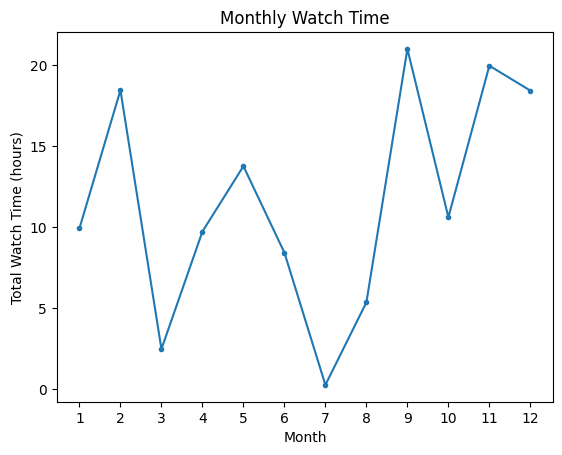

Most active month: September


In [8]:
import matplotlib.pyplot as plt
plt.plot(monthly_watchTime.index, monthly_watchTime.dt.total_seconds() / 3600,marker = '.')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (hours)')
plt.title('Monthly Watch Time')
plt.xticks(range(1,13))
plt.savefig('../visuals/monthly_watch_time.png')
plt.show()
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
print('Most active month:', months[monthly_watchTime.idxmax()])

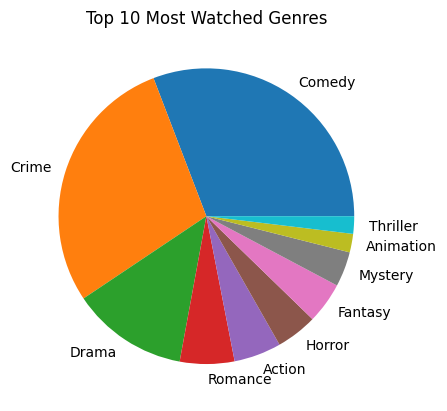

Most watched genre: Comedy


In [21]:
# Most Watched Genres
genres_watched = (
    data['genre']
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

plt.pie(genres_watched.values, labels=genres_watched.index)
plt.title('Top 10 Most Watched Genres')
plt.savefig('../visuals/most_watched_genres.png')
plt.show()

print('Most watched genre:', genres_watched.idxmax())


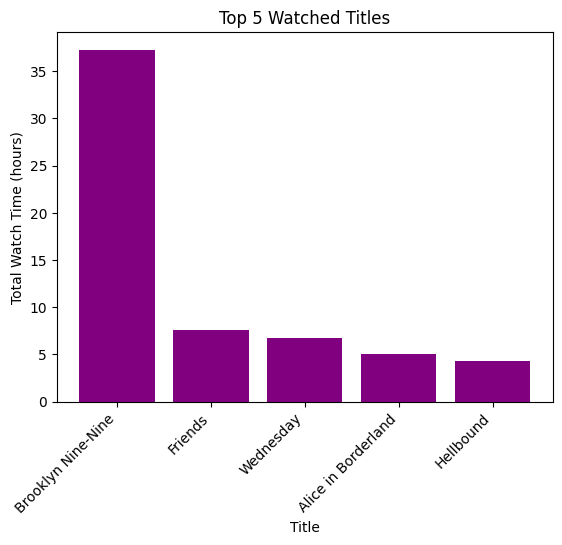

In [27]:
#Top Watched Titles
top_titles = data.groupby('title')['duration'].sum().sort_values(ascending=False).head(5)
plt.bar(top_titles.index, top_titles.dt.total_seconds() / 3600,color='purple')
plt.xlabel('Title')
plt.ylabel('Total Watch Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Watched Titles')
plt.savefig('../visuals/top_watched_titles.png', bbox_inches='tight')
plt.show()

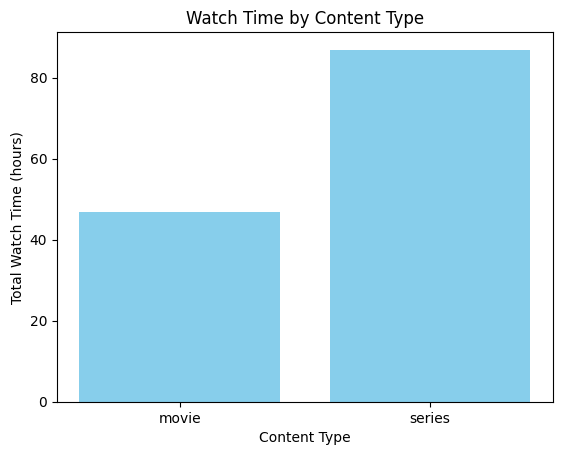

In [25]:
content_type = data.groupby('media_type')['duration'].sum()
plt.bar(content_type.index, content_type.dt.total_seconds() / 3600, color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Total Watch Time (hours)')
plt.title('Watch Time by Content Type')
plt.savefig('../visuals/watch_time_by_content_type.png')
plt.show()

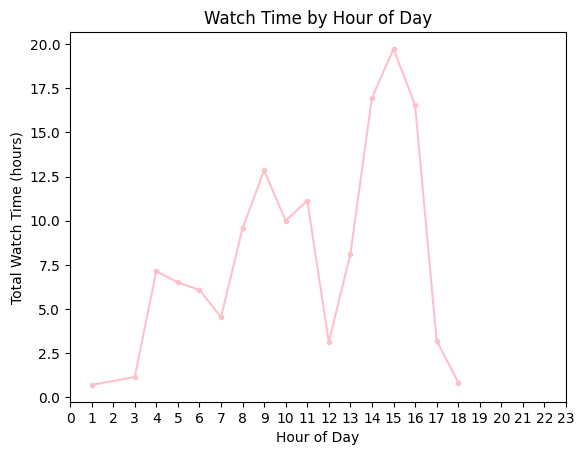

In [28]:
#Preferred Watching Time
data['hour'] = data['start_time'].dt.hour
hourly_watchTime = data.groupby('hour')['duration'].sum()
plt.plot(hourly_watchTime.index, hourly_watchTime.dt.total_seconds() / 3600, marker='.', color='pink')
plt.xlabel('Hour of Day')
plt.ylabel('Total Watch Time (hours)')
plt.title('Watch Time by Hour of Day')
plt.xticks(range(0, 24))
plt.savefig('../visuals/watch_time_by_hour.png')
plt.show()

In [ ]:
#Binge Watching 

data['watch_date'] = data['start_time'].dt.date
daily_watch = data[['watch_date']].drop_duplicates()
daily_watch = daily_watch.sort_values('watch_date')
daily_watch['watch_date'] = pd.to_datetime(daily_watch['watch_date'])
daily_watch['day_diff'] = daily_watch['watch_date'].diff().dt.days
daily_watch['streak_group'] = (daily_watch['day_diff'] != 1).cumsum()
streak_lengths = daily_watch.groupby('streak_group').size()
longest_streak = streak_lengths.max()

print("Longest binge streak (days):", longest_streak)


Longest binge streak (days): 14


Key Insights
- Viewing activity shows clear monthly variation, with peak watch time observed in September
- Comedy and Crime are the most frequently watched genres
- Series account for the majority of the viewing time compared to movies
- Viewing hours peek during the afternoon hours
- The longest binge-watching day streak was 14 consecutive days